In [5]:
# Import necessary libraries
import numpy as np
import numpy.linalg as lg
import networkx as nx
import matplotlib.pyplot as plt

# Tortoise

/tmp/ipykernel_442864/853327681.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')  # Use modern style


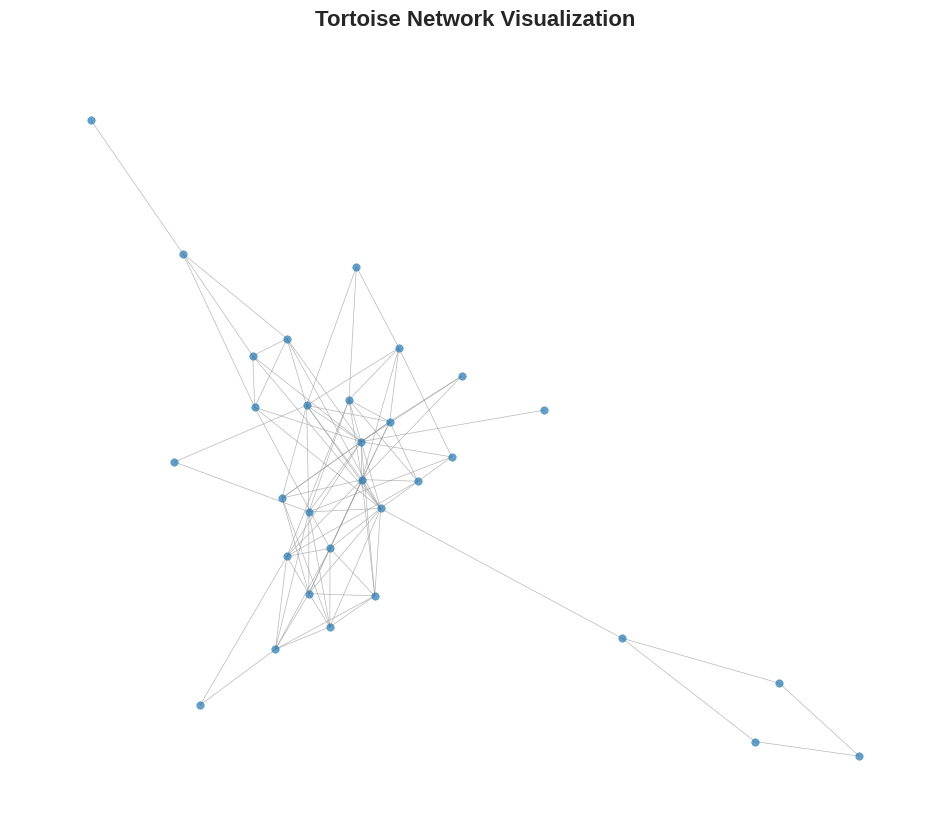

In [39]:
# 1. Load and preprocess the network with enhanced visualization settings
tort = nx.read_weighted_edgelist('Tortoise.txt', nodetype=int)

# 2. Create and validate adjacency matrix
A = nx.to_numpy_array(tort)
tort = nx.from_numpy_array(A_colo)

# 3. Generate optimized layout with better parameters
pos = nx.spring_layout(tort, 
                          k=1/np.sqrt(len(tort)),  # Optimal distance between nodes
                          iterations=50,             # More iterations for better layout
                          seed=np.random.RandomState(42))

# 4. Create enhanced visualization
plt.figure(figsize=(12, 10))
plt.style.use('seaborn')  # Use modern style

# Draw network with improved aesthetics
nx.draw_networkx(tort, pos_colo,
                with_labels=False,
                node_size=30,                # Slightly larger nodes
                node_color='#1f77b4',        # Modern blue color
                edge_color='#999999',        # Subtle edge color
                alpha=0.7,                   # Slight transparency
                width=0.5)                   # Thinner edges

plt.title("Tortoise Network Visualization", 
          fontsize=16, 
          pad=20, 
          fontweight='bold')
plt.axis('off')

# Add a subtle background grid
plt.grid(True, alpha=0.1)

# Save high-resolution figure
plt.savefig("Tortoise_full.png", 
            dpi=300, 
            bbox_inches='tight',
            facecolor='white',
            edgecolor='none')
plt.show()


In [33]:
# 5. Calculate basic properties
n = len(A)  # Number of nodes
e = np.ones(n)  # Vector of ones
k = np.dot(A, e)  # Degree vector (sum of each row)
print("Tortoise degree vector:\n", k)


Tortoise degree vector:
 [ 9.  7.  7.  9.  4.  6. 15.  2. 10. 13.  9.  8.  8.  2.  7.  4.  3. 13.
  9.  6.  6.  3.  3.  2.  2.  2.  6.  4.  1.  5.  1.]


# Spectral decomposition of adjacency matrix for community detection

In [36]:
# 6. Eigenvalue decomposition
u, v = lg.eigh(A)  # u=eigenvalues, v=eigenvectors

# Create table for eigenvalues
eigenvalue_table = table([
    ["Index", "Eigenvalue"],
    *[[i, u[i]] for i in range(len(u))]
], header_row=True)
print("Eigenvalues (u):")
show(eigenvalue_table)

# Create table for eigenvectors
eigenvector_table = table([
    ["Index"] + [f"Component {i+1}" for i in range(len(v[0]))],
    *[[i] + list(v[i]) for i in range(len(v))]
], header_row=True)
print("\nEigenvectors (v):")
show(eigenvector_table)


Eigenvalues (u):


Index,Eigenvalue
,
,
,
,
,
,
,
,
,
,



Eigenvectors (v):


Index,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,Component 11,Component 12,Component 13,Component 14,Component 15,Component 16,Component 17,Component 18,Component 19,Component 20,Component 21,Component 22,Component 23,Component 24,Component 25,Component 26,Component 27,Component 28,Component 29,Component 30,Component 31
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


### Spectral Partitioning: The network is divided into two communities using the eigenvector corresponding to the second most negative eigenvalue. This method identifies natural groupings in the network structure.

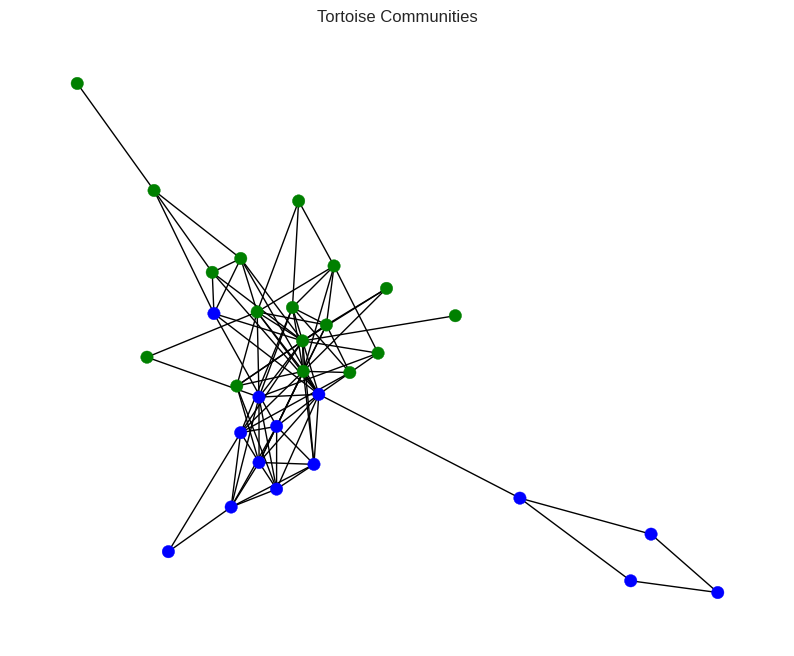

In [44]:
# 8. Community detection
P = v[:,n-2]  # Eigenvector for most negative eigenvalue
C1 = np.where(P > 0)[0]  # First community (positive components)
C2 = np.where(P <= 0)[0] # Second community (non-positive)

# 9. Color nodes by community
color = np.tile('g', n)  # Default color green
color[C1] = 'b'          # Community 1 blue

# 10. Draw communities
plt.figure(figsize=(10, 8))
nx.draw_networkx(tort, pos, node_color=color, with_labels=False, node_size=80)
plt.title("Tortoise Communities")
plt.axis('off')
plt.savefig("Tortoise_communities.png")
plt.show()


 #### This section analyzes the community structure by computing:
 - Number of nodes in each community
 - Internal connections within Community 1
 - Internal connections within Community 2 
 - Cross-connections between communities
 - Total edge count for validation

In [46]:
# 11. Calculate community edges
edges_within_C_1 = np.sum(A[np.ix_(C1, C1)])/2 
edges_within_C_2 = np.sum(A[np.ix_(C2, C2)])/2
edges_between = np.sum(A[np.ix_(C1, C2)])
total_edges = np.sum(A)/2

print("\nCommunity Structure:\n")

print(f"Community 1 size: {len(C1)}, Community 2 size: {len(C2)}\n")

print("Edges Within C1:", edges_within_C_1, "\n")

print("Edges Within C2:", edges_within_C_2, "\n")

print("Edges between C1 and C2:", edges_between, "\n")
      
print("Total:", total_edges)



Community Structure:

Community 1 size: 14, Community 2 size: 17

Edges Within C1: 30.0 

Edges Within C2: 37.0 

Edges between C1 and C2: 26.0 

Total: 93.0


 #### This section analyzes network structure by computing:
 - Watts-Strogatz clustering coefficient (measures local connectivity)
 - Triangle motifs (C3) - closed triplets of connected nodes
 - Square motifs (C4) - closed quadruplets of connected nodes
 These metrics help characterize the network's structural organization and clustering patterns.

In [54]:
# 7. Count triangles and squares
triangles = sum(u**3)/6  # Tr(A^3) = 6*number of triangles

# Calculate |P₁| (number of edges)
m = tort.number_of_edges()

# Calculate |P₂| (number of paths of length 2)
degrees = [d for n, d in tort.degree()]
P2 = sum(d*(d-1)/2 for d in degrees)  # sum of (k_i choose 2)

# Calculate μ₄ (sum of fourth powers of eigenvalues)
mu4 = sum(u**4)

# Now calculate C4 using the correct formula
squares = (mu4 - 2*m - 4*P2)/8

# Calculate clustering coefficient and motifs
ws_clustering = nx.average_clustering(tort)

# Create a formatted table using tabulate
from tabulate import tabulate

table_data = [
    ["Watts-Strogatz clustering coefficient", f"{ws_clustering:.4f}"],
    ["Tortoise triangles (C3)", f"{triangles:.2f}"],
    ["Tortoise squares (C4)", f"{squares:.2f}"]
]

print("\nClustering and Motifs:\n")
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt="grid"))


Clustering and Motifs:

+---------------------------------------+----------+
| Metric                                |    Value |
+=======================================+==========+
| Watts-Strogatz clustering coefficient |   0.4635 |
+---------------------------------------+----------+
| Tortoise triangles (C3)               |  96      |
+---------------------------------------+----------+
| Tortoise squares (C4)                 | 397      |
+---------------------------------------+----------+


 #### This section analyzes node influence through three centrality metrics:
 - Degree centrality: Identifies highly connected nodes
 - Closeness centrality: Finds nodes that are centrally located in the network
 - Betweenness centrality: Highlights nodes that are critical for information flow
 These measures help identify the most structurally important nodes in the network.

In [55]:
# Centrality measures
degree_centrality = nx.degree_centrality(tort)
closeness_centrality = nx.closeness_centrality(tort)
betweenness_centrality = nx.betweenness_centrality(tort)

# Get top 5 nodes for each centrality
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

print("\nTop Central Nodes:\n")
print("Degree centrality:", [x[0] for x in top_degree], "\n")
print("Closeness centrality:", [x[0] for x in top_closeness], "\n")
print("Betweenness centrality:", [x[0] for x in top_betweenness])



Top Central Nodes:

Degree centrality: [6, 9, 17, 8, 0] 

Closeness centrality: [6, 9, 17, 8, 0] 

Betweenness centrality: [9, 6, 22, 8, 17]


### This section visualizes the network's key nodes by highlighting the top 5 nodes for each centrality metric (degree, closeness, betweenness) using distinct colors. The visualizations help identify and compare the spatial distribution of influential nodes within the network structure.

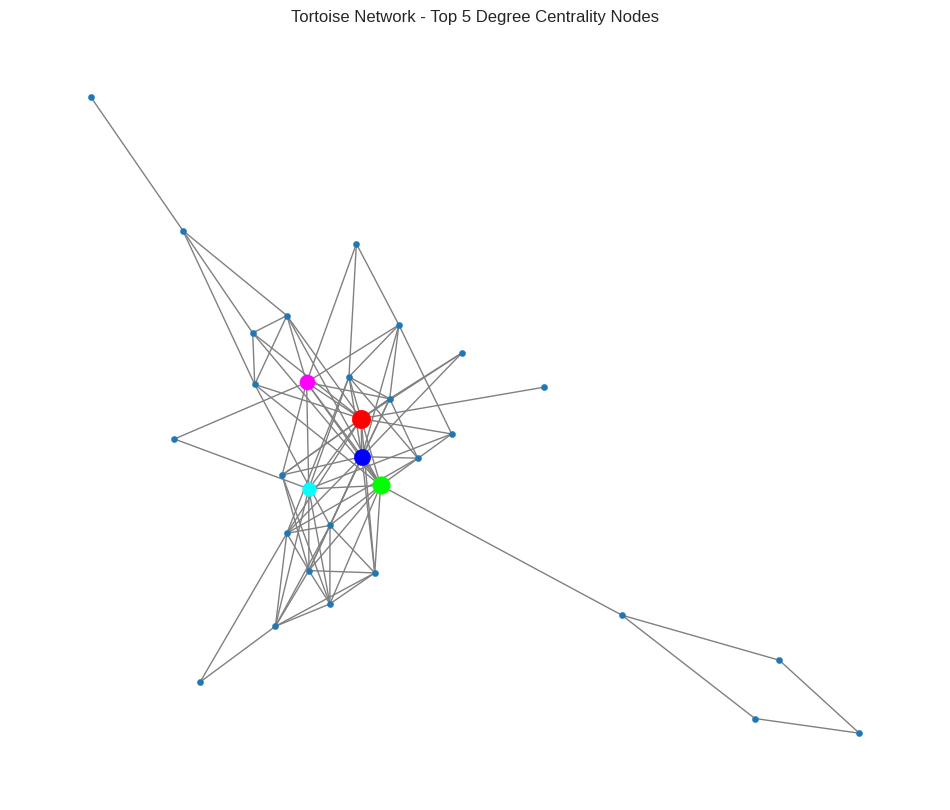

In [57]:
# 13. Visualize top nodes for each centrality measure (default colors with highlighted top nodes)

# Define a color palette for top nodes
top_colors = ['#FF0000', '#00FF00', '#0000FF', '#FF00FF', '#00FFFF']  # Red, Green, Blue, Magenta, Cyan

# Degree centrality visualization
plt.figure(figsize=(12, 10))
# Draw the base network with default colors
nx.draw_networkx(tort, pos, with_labels=False, node_size=20, edge_color='gray')

# Highlight top degree centrality nodes
for i, (node, _) in enumerate(top_degree):
    nx.draw_networkx_nodes(tort, pos, nodelist=[node], 
                         node_color=top_colors[i], node_size=100+(4-i)*20)
    
plt.title("Tortoise Network - Top 5 Degree Centrality Nodes")
plt.axis('off')
plt.savefig("Tortoise_degree_centrality.png")
plt.show()

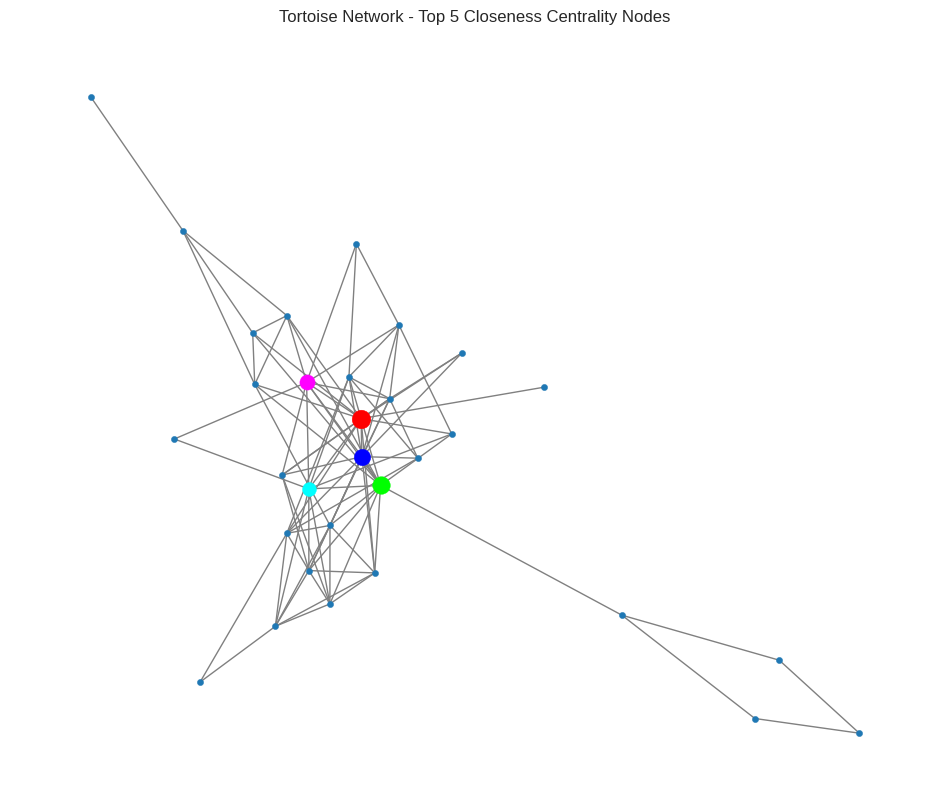

In [58]:


# Closeness centrality visualization
plt.figure(figsize=(12, 10))
# Draw the base network with default colors
nx.draw_networkx(tort, pos, with_labels=False, node_size=20, edge_color='gray')

# Highlight top closeness centrality nodes
for i, (node, _) in enumerate(top_closeness):
    nx.draw_networkx_nodes(tort, pos, nodelist=[node], 
                         node_color=top_colors[i], node_size=100+(4-i)*20)
    
plt.title("Tortoise Network - Top 5 Closeness Centrality Nodes")
plt.axis('off')
plt.savefig("Tortoise_closeness_centrality.png")
plt.show()



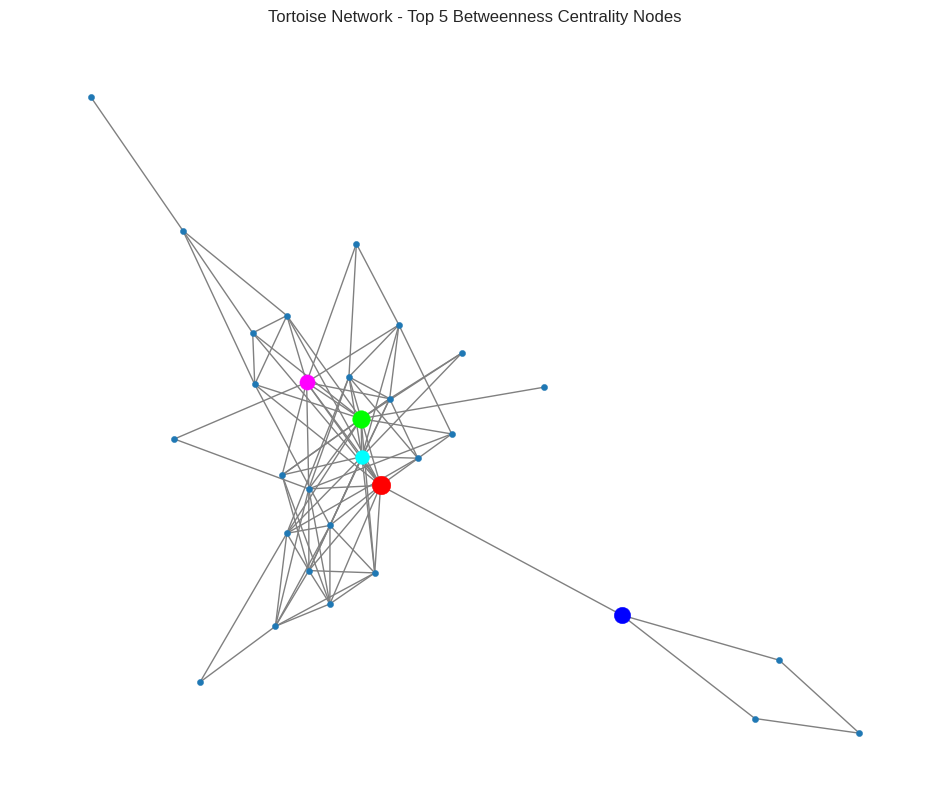

In [59]:
# Betweenness centrality visualization
plt.figure(figsize=(12, 10))
# Draw the base network with default colors
nx.draw_networkx(tort, pos, with_labels=False, node_size=20, edge_color='gray')

# Highlight top betweenness centrality nodes
for i, (node, _) in enumerate(top_betweenness):
    nx.draw_networkx_nodes(tort, pos, nodelist=[node], 
                         node_color=top_colors[i], node_size=100+(4-i)*20)
    
plt.title("Tortoise Network - Top 5 Betweenness Centrality Nodes")
plt.axis('off')
plt.savefig("Tortoise_betweenness_centrality.png")
plt.show()

#### This code generates and visualizes a random Erdős-Rényi graph with the same node count and expected edge density as the ColoSpg network, enabling structural comparisons between real-world and random networks

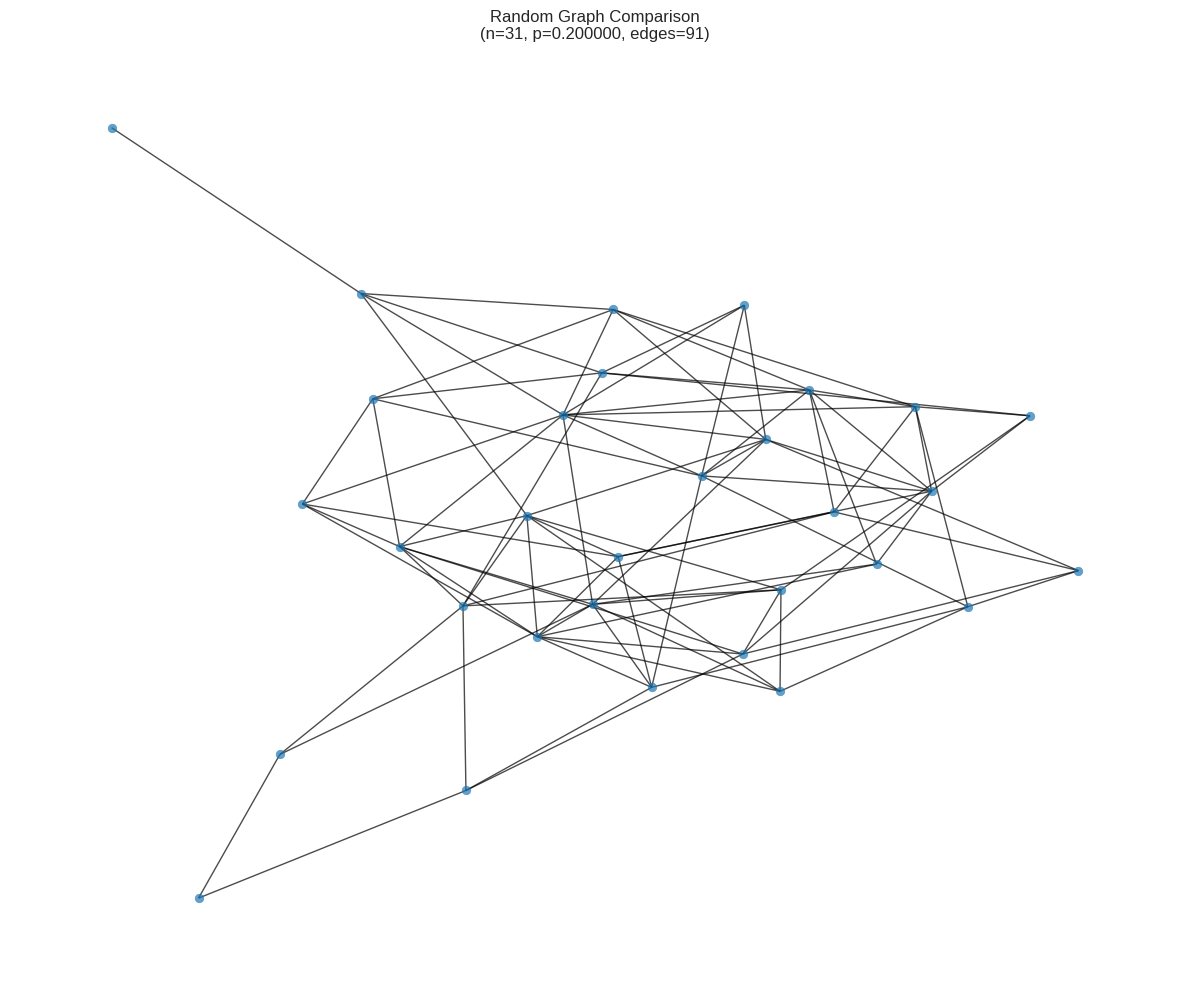

In [60]:
# 12. Create and draw random graph comparison
m_colo = total_edges_colo
p_colo = 2*m_colo/(n_colo*(n_colo-1))  # Connection probability
G_random_colo = nx.erdos_renyi_graph(n_colo, p_colo, seed=None)  # Removed fixed seed to avoid ValueError

# Draw the random graph
plt.figure(figsize=(12, 10))
pos_random_colo = nx.spring_layout(G_random_colo, seed=None)  # Removed fixed seed for consistent layout
nx.draw_networkx(G_random_colo, pos_random_colo, with_labels=False, node_size=40, alpha=0.7)
plt.title(f"Random Graph Comparison\n(n={n_colo}, p={p_colo:.6f}, edges={G_random_colo.number_of_edges()})")
plt.axis('off')
plt.tight_layout()
plt.savefig("ColoSpg_random_comparison.png", dpi=300, bbox_inches='tight')
plt.show()

#### This section calculates the adjacency matrix and eigenvalue spectrum of the random graph to enable quantitative comparison with the real ColoSpg network's structural properties.

In [62]:
import pandas as pd

# 12. Create random graph comparison
m_colo = total_edges_colo
G_random_colo = nx.erdos_renyi_graph(n_colo, 2*m_colo/(n_colo*(n_colo-1)))
A_random_colo = nx.to_numpy_array(G_random_colo)
u_random_colo, _ = lg.eigh(A_random_colo)

# Create a table to display the eigenvalues
eigenvalue_table = pd.DataFrame({
    'Index': range(len(u_random_colo)),
    'Eigenvalue': u_random_colo
})

print("\nRandom Graph Eigenvalues:")
print(eigenvalue_table.to_string(index=False))



Random Graph Eigenvalues:
 Index  Eigenvalue
     0   -4.021574
     1   -3.891294
     2   -3.713238
     3   -3.191244
     4   -2.725114
     5   -2.314113
     6   -2.188304
     7   -1.944935
     8   -1.894744
     9   -1.669853
    10   -1.370993
    11   -1.001596
    12   -0.855452
    13   -0.476465
    14   -0.352467
    15   -0.157477
    16    0.097547
    17    0.293411
    18    0.631185
    19    0.847073
    20    1.067087
    21    1.291323
    22    1.656619
    23    1.873334
    24    2.084070
    25    2.232162
    26    2.678774
    27    2.784197
    28    3.033075
    29    4.089977
    30    7.109025


#### This part calculates and compares clustering coefficients and motif counts (triangles C3, squares C4) between the real ColoSpg network and its random counterpart to identify statistically significant structural patterns.

In [63]:
# 14. Count triangles and squares in the random network
random_triangles_colo = sum(u_random_colo**3)/6  # Tr(A^3) = 6*number of triangles

# Calculate |P₁| (number of edges in the random network)
random_m = G_random_colo.number_of_edges()

# Calculate |P₂| (number of paths of length 2 in the random network)
random_degrees = [d for n, d in G_random_colo.degree()]
random_P2 = sum(d*(d-1)/2 for d in random_degrees)  # sum of (k_i choose 2)

# Calculate μ₄ (sum of fourth powers of eigenvalues)
random_mu4 = sum(u_random_colo**4)

# Now calculate C4 using the correct formula
random_squares_colo = (random_mu4 - 2*random_m - 4*random_P2)/8

# Calculate clustering coefficient and motifs
random_ws_clustering = nx.average_clustering(G_random_colo)

# Create table data
data = [
    ["Clustering Coefficient", random_ws_clustering],
    ["Triangles (C3)", random_triangles_colo],
    ["Squares (C4)", random_squares_colo]
]

# Display results in table format
%display latex
table(data, header_column=["Metric", "Value"])

Metric,Clustering Coefficient,
Value,Triangles (C3),


#### And then, we calculate and compare centrality measures (degree, closeness, betweenness) between the real ColoSpg network and its random counterpart to identify statistically significant node importance patterns.

In [64]:
# Centrality measures
degree_centrality = nx.degree_centrality(G_random_colo)
closeness_centrality = nx.closeness_centrality(G_random_colo)
betweenness_centrality = nx.betweenness_centrality(G_random_colo)

# Get top 5 nodes for each centrality
random_top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
random_top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
random_top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

%display latex
data = [
    ["Degree Centrality", [x[0] for x in random_top_degree]],
    ["Closeness Centrality", [x[0] for x in random_top_closeness]],
    ["Betweenness Centrality", [x[0] for x in random_top_betweenness]]
]
table(data, header_column=["Centrality Type", "Top 5 Nodes"])

Centrality Type,Degree Centrality,
Top 5 Nodes,Closeness Centrality,
